## Example -- IEA Wind 740-10-MW

**IEA Wind TCP Task 55: The IEA Wind 740-10-MW Reference Offshore Wind Plants**

<https://www.osti.gov/biblio/2333634/>

This notebook uses `optiwindnet` to route the collector system cables for the two wind power plants presented in the report above.

This example requires an additional package:

`pip install pyyaml-include`

In [1]:
import numpy as np
from optiwindnet.api import WindFarmNetwork, MetaHeuristic

### Additional design parameters

In [2]:
borderC = np.array( # coordinate sequence defines the polygon, last-first segment implicit
    [[1951, 200], [1951, 1383], [386, 1383], [650, 708], [624, 678],
     [4, 1036], [4, 3], [1152, 3], [917, 819], [957, 854]],
    dtype=float)
obstaclesC = [
    # first obstacle
    np.array([[1540, 920], [1600, 940], [1600, 1150], [1400, 1200]]),
    # [second obstacle] ...
]
substationsC = np.array([[696, 1063],], dtype=float)
turbinesC = np.array(
    [[1940, 279], [1920, 703], [1475, 696], [1839, 1250],
     [1277, 1296], [442, 1359], [737, 435], [1060, 26],
     [522, 176], [87, 35], [184, 417], [71, 878]],
    dtype=float
)
cables = [(3, 206), (5, 287), (7, 406)]

### Load layouts from files

In [3]:
wfn = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=cables, borderC=borderC, obstaclesC=obstaclesC)

<Axes: >

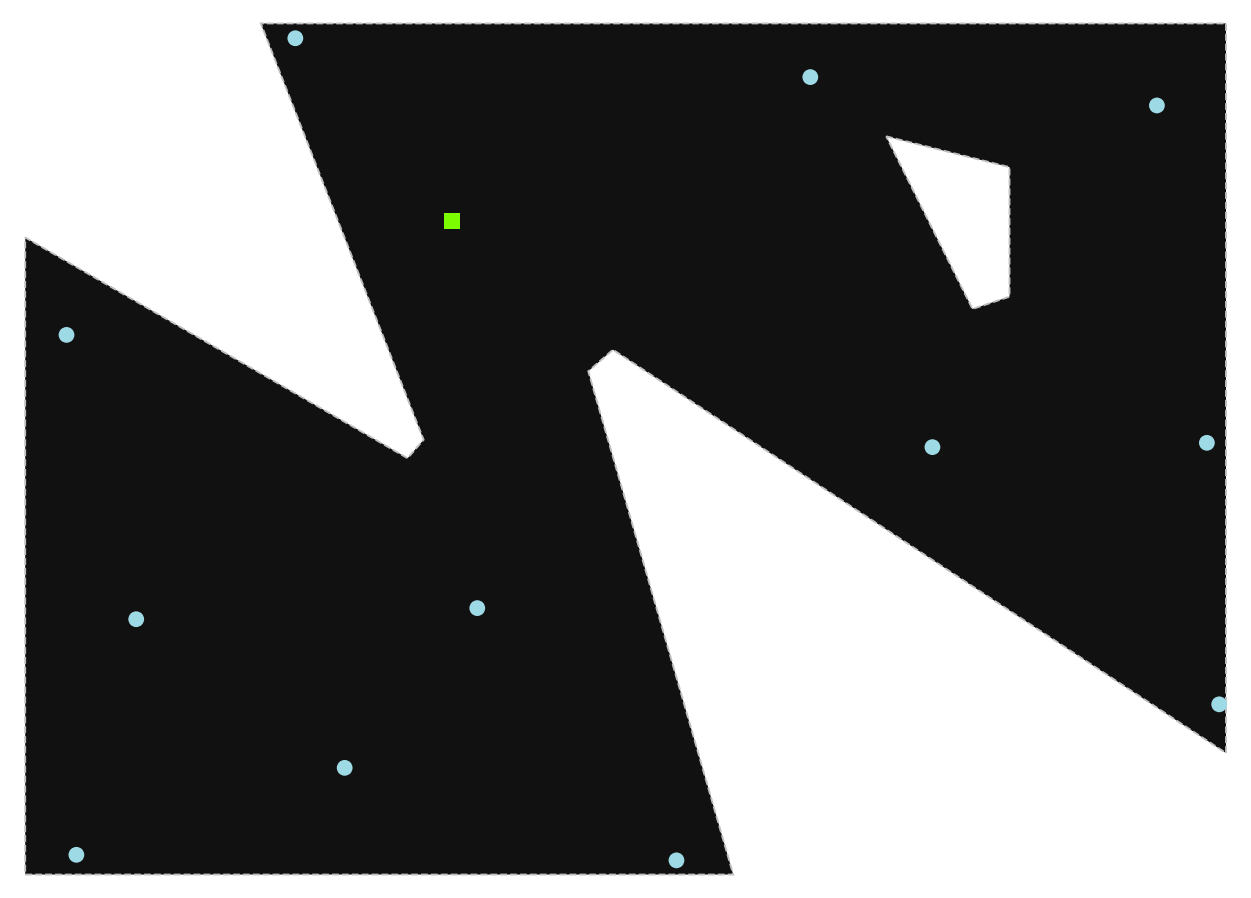

In [4]:
wfn.plot_location()

### Choose solver

In [5]:
router = MetaHeuristic(time_limit=5)

### Regular layout

In [6]:
res = wfn.optimize(router=router)

Check the total length of the warm-start solution:

In [7]:
wfn.length() # value with hge = 139656.4789599965


6358.771791049169

In [8]:
wfn.cost() # originally = 40714260.58298516

1714738.2647596467

<Axes: >

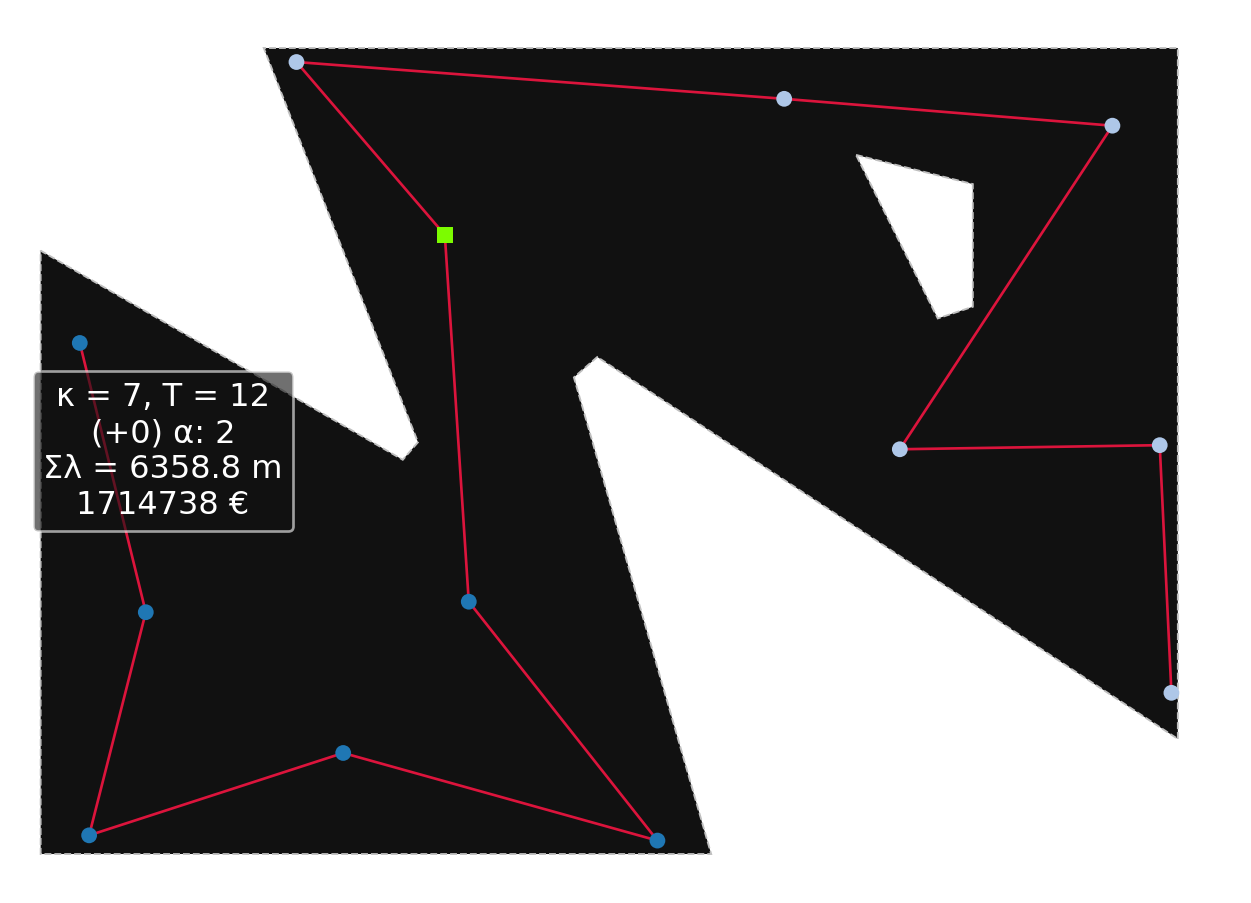

In [9]:
wfn.plot()

<Axes: >

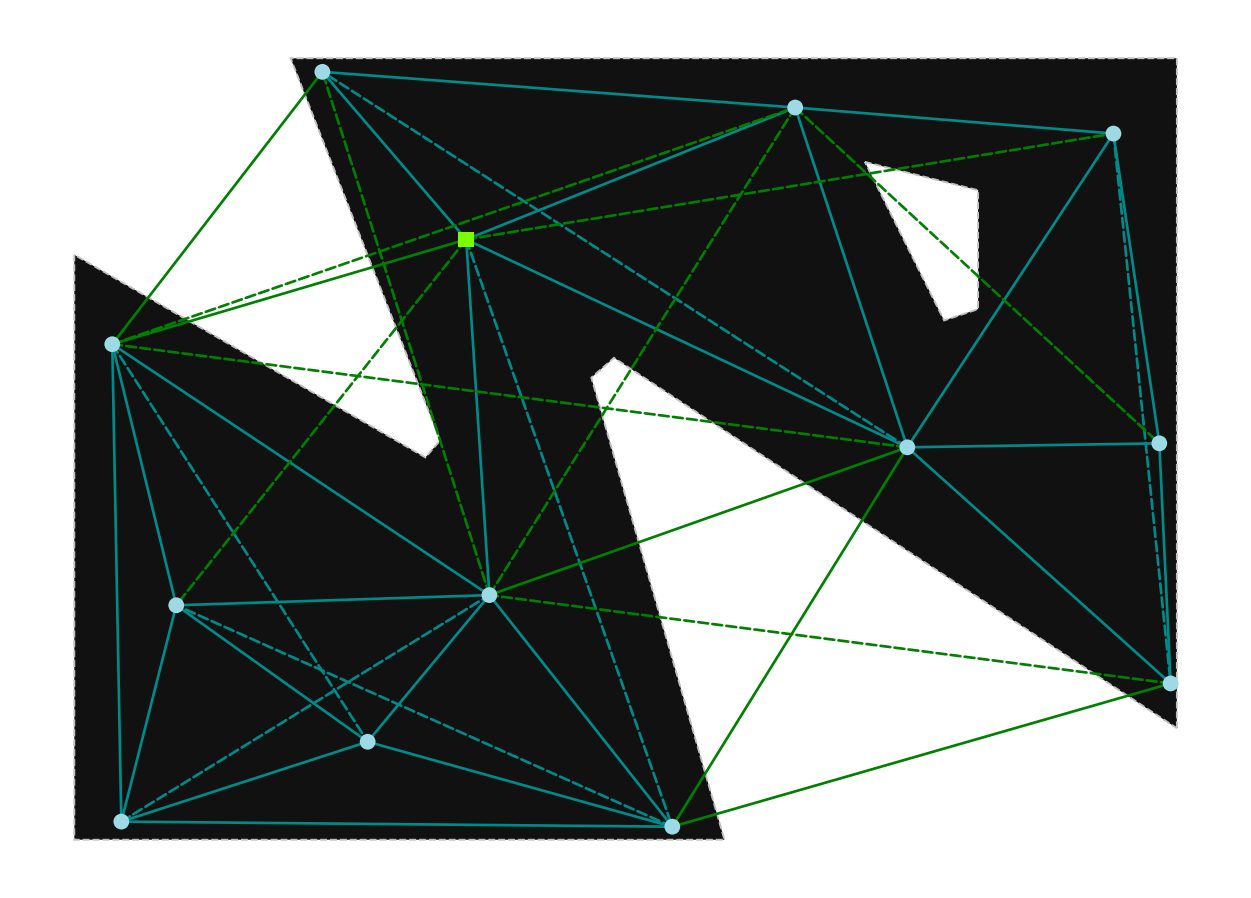

In [11]:
wfn.plot_available_links()

<Axes: >

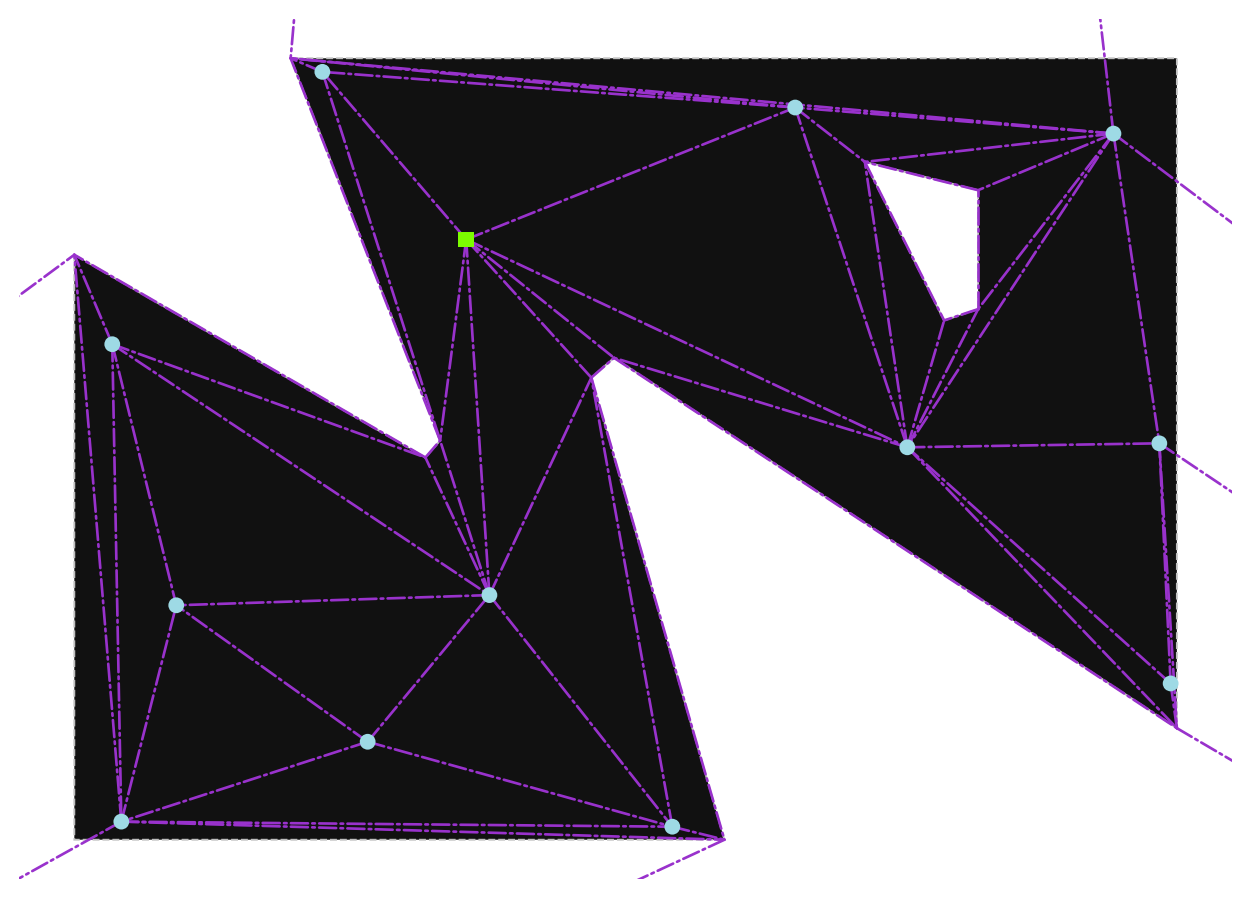

In [12]:
wfn.plot_navigation_mesh()

<Axes: >

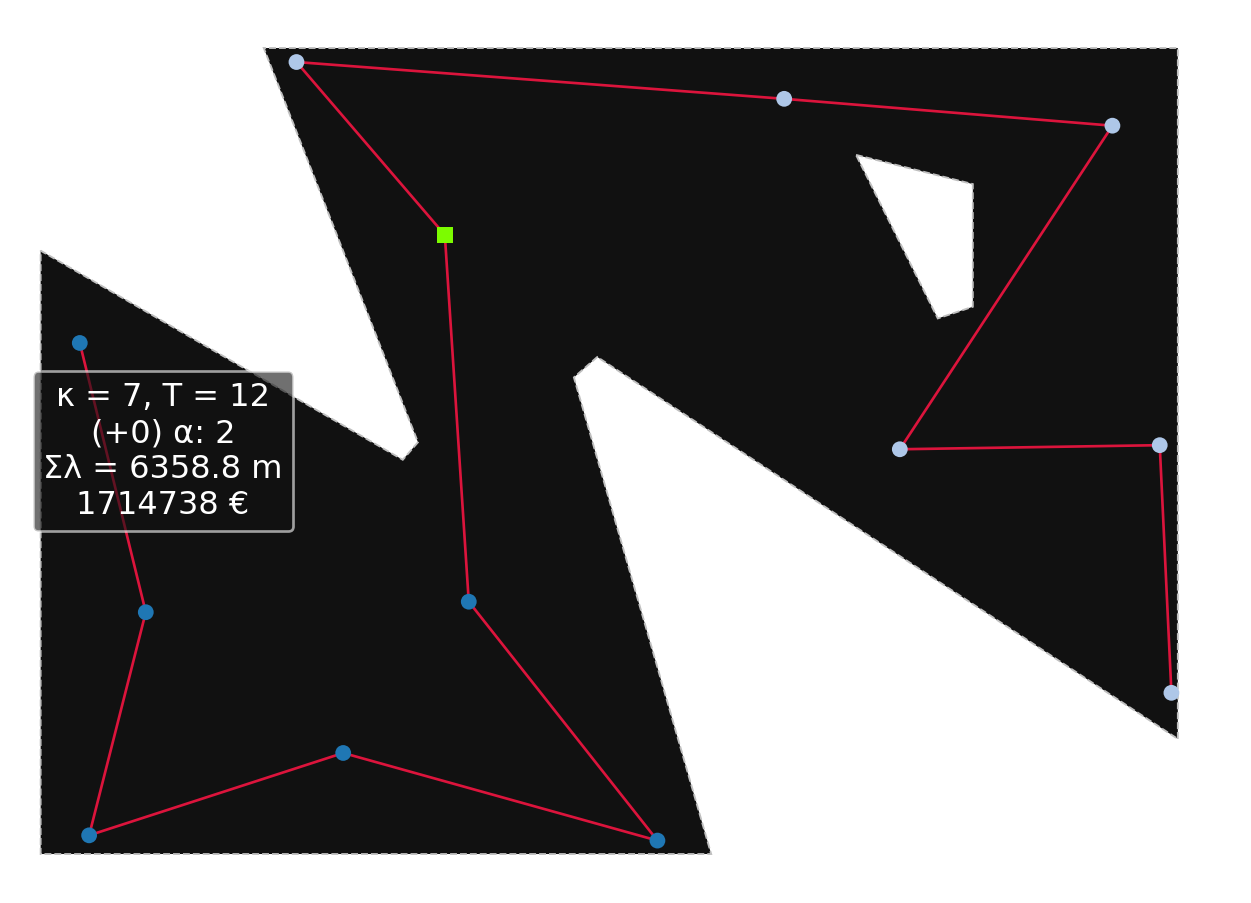

In [13]:
wfn.plot_selected_links()